<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Least Squares in R

# Least Squares in R

# MA313: Week 11 - Least Squars in R <span style='color:green'>(V1.0)</span>


** Example of using R for solving a least squares problem. Week 11 of MA313, 18 November, 2022.**

Dr [Niall Madden](mailto:Niall.Madden@UniversityOfGalway.ie), School of Mathematical and Statistical Sciences, 
University of Galway.
            
You can find these slides as a Jupyter notebook Blackboard (including the xlsx file).
* as HTML at: [https://www.niallmadden.ie/2223-CS103](https://www.niallmadden.ie/2223-CS103)
* Jupyter notebook on Binder [https://mybinder.org/v2/gh/niallmadden/2223-cs103/main](https://mybinder.org/v2/gh/niallmadden/2223-cs103/main) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/niallmadden/2223-cs103/main)

* Both formats on Github: [https://github.com/niallmadden/2223-cs103](https://github.com/niallmadden/2223-cs103)


***

<div class="pink"><font size="+1"><em>This notebook was written by Niall Madden, and uses some material from Chapter 11 of <a href="https://greenteapress.com/thinkpython2/html">Think Python</a>.</em></div>

In [21]:
my_data

X,Y
1,2
2,2
3,4
-1,-1
-2,-1
0,1
4,3


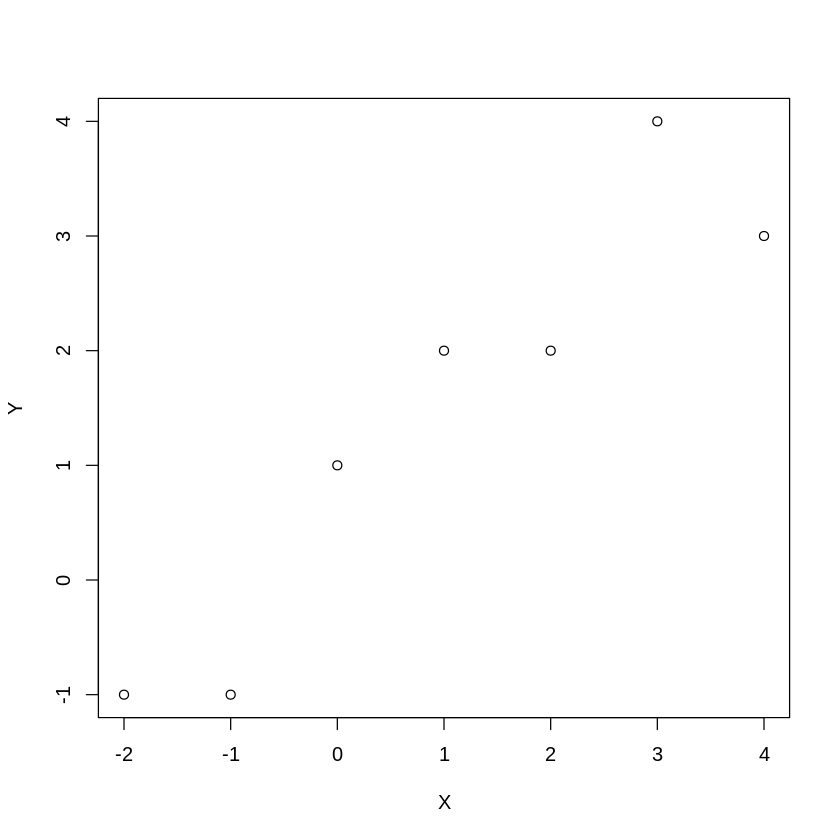

In [22]:
plot(my_data)

In [23]:
A =model.matrix(Y~X, data=my_data)

In [24]:
b=my_data$Y

In [25]:
t(A)

,1,2,3,4,5,6,7
(Intercept),1,1,1,1,1,1,1
X,1,2,3,-1,-2,0,4


In [26]:
(beta=solve(t(A) %*% A ,t(A)%*%b))

(Intercept),0.6071429
X,0.8214286


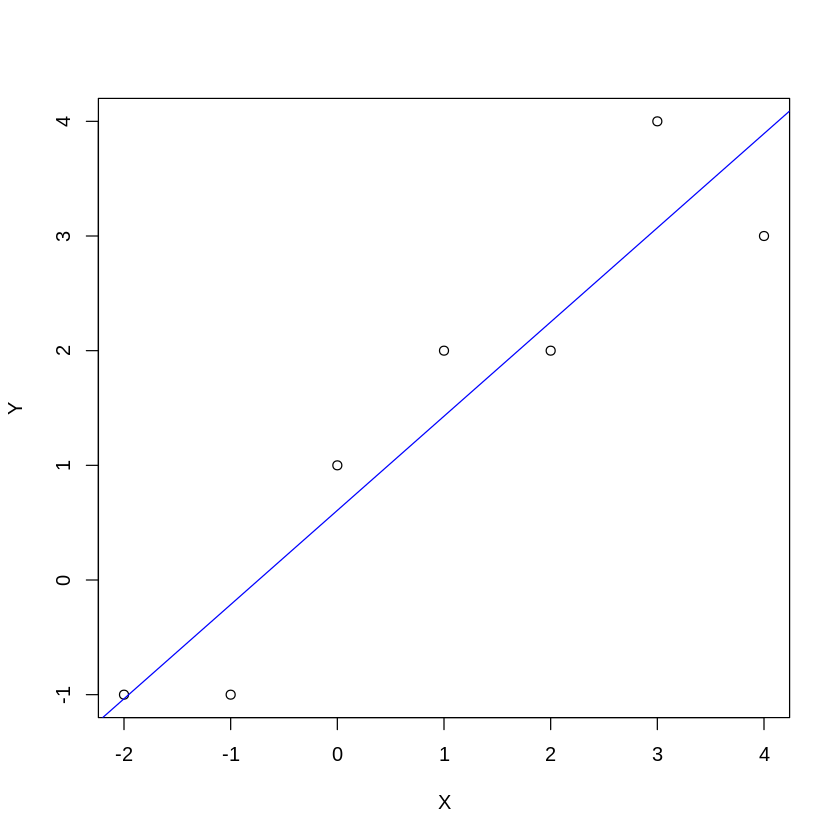

In [27]:
plot(my_data)
abline(beta[1],beta[2],col='blue')